In [1]:
%matplotlib inline

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src/')))
from sgpi.plot import *
from sgpi.util import scale, to_data_matrix, get_xy, get_dataset
import itertools

import pandas as pd
import pysgpp as sg

In [4]:
columns = ["x{}".format(i) for i in range(0, 64)] + ['digit']
df_train = pd.read_csv("../datasets/raw/mnist/optdigits.tra", header=None,index_col=None)
df_test = pd.read_csv("../datasets/raw/mnist/optdigits.tes", header=None,index_col=None)
df_train.columns = columns
df_test.columns = columns

In [21]:
df_test.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,digit
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [4]:
df_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,digit
count,3823.0,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,...,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000
mean,0.0,0.301334,5.481821,11.805912,11.451478,5.505362,1.387392,0.142297,0.002093,1.960502,...,0.148313,0.000262,0.283024,5.855872,11.942977,11.461156,6.700497,2.105676,0.202197,4.497253
std,0.0,0.866986,4.631601,4.259811,4.537556,5.613060,3.371444,1.051598,0.088572,3.052353,...,0.767761,0.016173,0.928046,4.980012,4.334508,4.991934,5.775815,4.028266,1.150694,2.869831
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,15.000000,...,12.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [5]:
# Create a scaler using the complete dataset.
# Division by 16 also works, but the columns do not all have a maximum of 16,
# so this results in a better distribution.
df_complete = df_train.append(df_test, ignore_index=True)
scaler , _ = scale(df_complete)
_, df_train = scale(df_train, scaler)
_, df_test = scale(df_test, scaler)

/home/lukas/bin/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
sg.omp_set_num_threads(4)

In [47]:
from sgpi.mnist import mnist_interactions, l2_distance
interactions = mnist_interactions(l2_distance, np.sqrt(2), 3)

grid_config = sg.RegularGridConfiguration()
grid_config.dim_ = 64
grid_config.level_ = 2
grid_config.t_ = 0.0
grid_config.type_ = sg.GridType_ModLinear

adaptivity_config = sg.AdpativityConfiguration()
adaptivity_config.numRefinements_ = 0

solver_config = sg.SLESolverConfiguration()
solver_config.type_ = 0
solver_config.maxIterations_ = 20
solver_config.threshold_ = 10e-4
solver_config.eps_ = np.sqrt(np.finfo(np.double).resolution)
final_solver_config = solver_config

regularization_config = sg.RegularizationConfiguration()
regularization_config.type_ = sg.RegularizationType_Identity
regularization_config.lambda_ = 10e-6

In [48]:
estimator = sg.ClassificationLearner(grid_config, adaptivity_config, solver_config, final_solver_config,
                                     regularization_config, interactions)

In [49]:
X, y = get_xy(df_train)
X = to_data_matrix(X)
y = sg.DataVector(y)
X_test, y_test = get_xy(df_test)
X_test = to_data_matrix(X_test)
y_test = sg.DataVector(y_test)

In [50]:
estimator.train(X, y)

In [52]:
estimator.getAccuracy(X_test, y_test)

97.41219963031423

In [56]:
y_hat = estimator.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test.array(), y_hat.array())

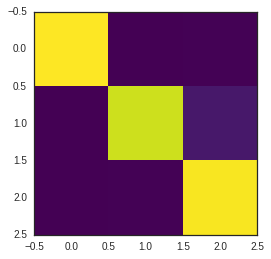

In [58]:
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.viridis)

In [46]:
estimator.getGridSize() / 10

77L

In [2]:
df_train = get_dataset('optdigits_train')
df_test = get_dataset('optdigits_test')

In [64]:
df_train = df_train[(df_train['digit'] == 2) | (df_train['digit'] == 7) | (df_train['digit'] == 9)]
df_test = df_test[(df_test['digit'] == 2) | (df_test['digit'] == 7) | (df_test['digit'] == 9)]

In [4]:
df_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,digit
count,1149.0,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.0,1149.000000,...,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000
mean,0.0,0.061575,0.470681,0.818755,0.705994,0.416449,0.170746,0.021867,0.0,0.169658,...,0.010912,0.000870,0.049173,0.503427,0.782583,0.552600,0.397465,0.215731,0.025457,6.011314
std,0.0,0.141986,0.291336,0.207515,0.300869,0.400207,0.298781,0.103387,0.0,0.210129,...,0.050556,0.029501,0.126159,0.308310,0.243314,0.396012,0.399321,0.324196,0.090845,2.937332
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.0,0.000000,0.250000,0.750000,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.687500,0.125000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,0.437500,0.875000,0.812500,0.312500,0.000000,0.000000,0.0,0.062500,...,0.000000,0.000000,0.000000,0.500000,0.875000,0.687500,0.375000,0.000000,0.000000,7.000000
75%,0.0,0.000000,0.687500,1.000000,1.000000,0.812500,0.250000,0.000000,0.0,0.312500,...,0.000000,0.000000,0.000000,0.750000,1.000000,0.937500,0.750000,0.375000,0.000000,9.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.937500,...,0.615385,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.875000,9.000000


In [6]:
np.where(df_train.max())

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),)

In [9]:
from sgpi.mnist import mnist_interactions, l2_distance

In [ ]:
mnist_interactions(l2_distance, 2**0.5, )